In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
datatype_val_counts = pd.DataFrame(data['type'].value_counts())
datatype_val_counts.reset_index(inplace = True)

Text(0.5, 1.0, 'Movie/TV Show distribution')

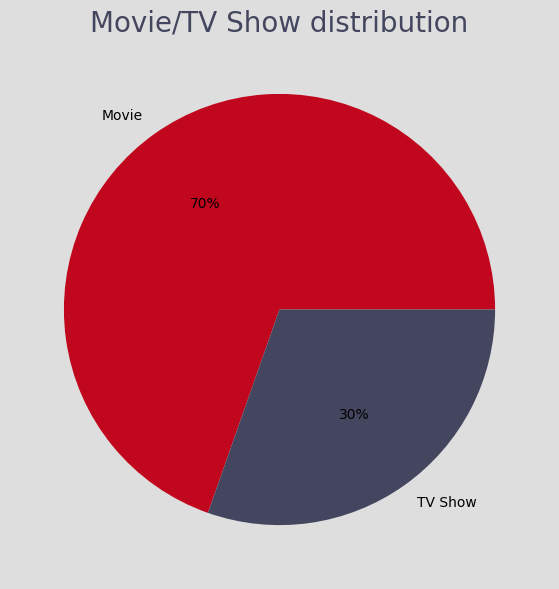

In [ ]:
fig, ax = plt.subplots(figsize = (15,7), facecolor='#dedede')
plt.pie(datatype_val_counts['type'], labels = datatype_val_counts['index'], autopct='%1.0f%%', colors = ['#c1071e','#43465e'])
plt.title(label='Movie/TV Show distribution',
          fontsize=20,
          color='#43465e')

In [ ]:
listed_in = pd.DataFrame(data['listed_in'].value_counts())
listed_in.reset_index(inplace = True)
listed_in.sort_values(by='listed_in', ascending = False).head(10)

,index,listed_in
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,220
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


<ipython-input-14-969aeb129e59>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(listed_in['index'].iloc[:11], rotation=(90))


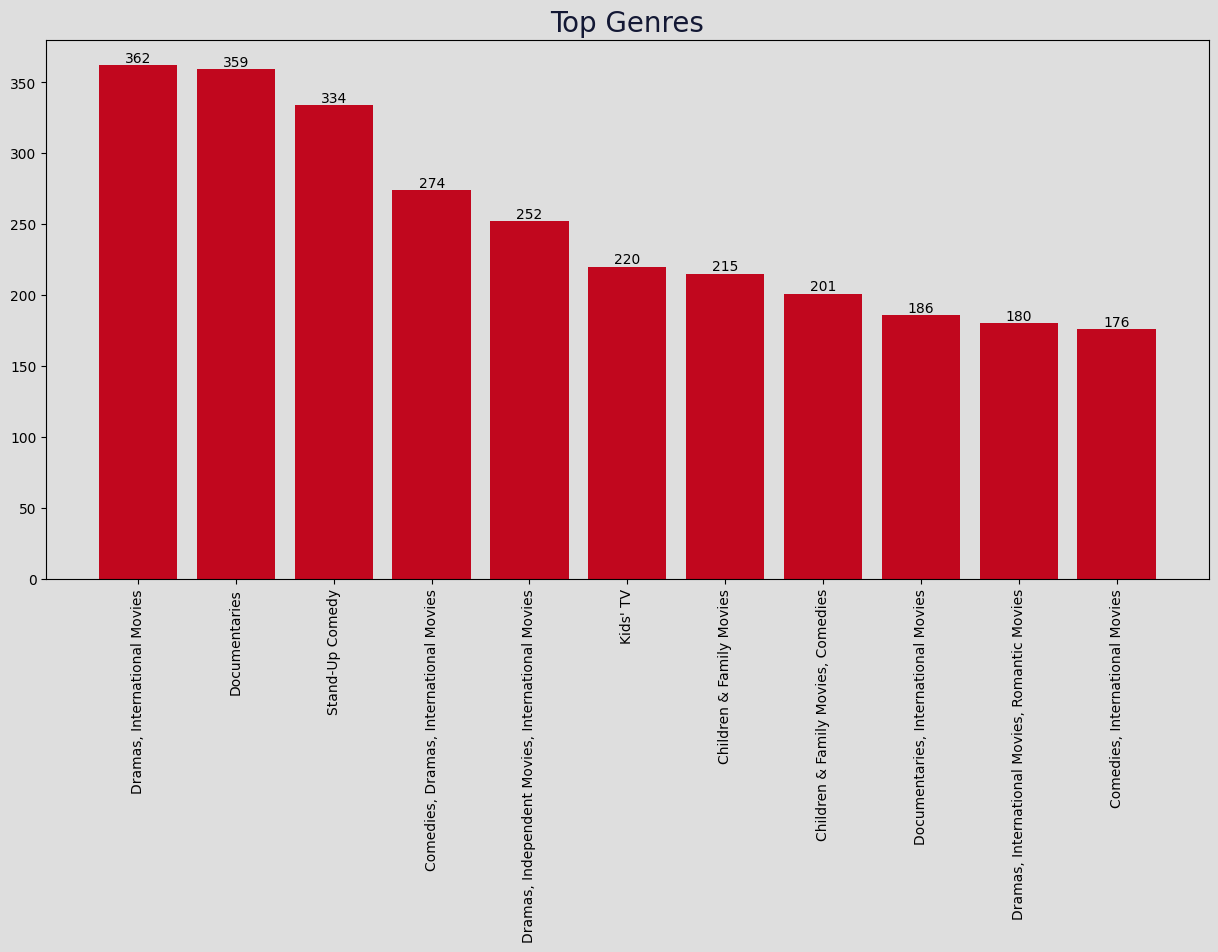

In [ ]:
fig, ax = plt.subplots(figsize = (15,7), facecolor='#dedede')
bar_color = ['#c1071e']
background_color = ['#43465e']
bar_container = ax.bar(listed_in['index'].iloc[:11], listed_in['listed_in'].iloc[:11], color = bar_color)
ax.set_xticklabels(listed_in['index'].iloc[:11], rotation=(90))
ax.set_facecolor('#dedede')
plt.title(label="Top Genres",
          fontsize=20,
          color="#131834")
ax.bar_label(bar_container, fmt='{:,.0f}');

In [ ]:
release_years = pd.DataFrame(data['release_year'].value_counts())
release_years.reset_index(inplace = True)
release_years.sort_values(by='index', inplace= True)

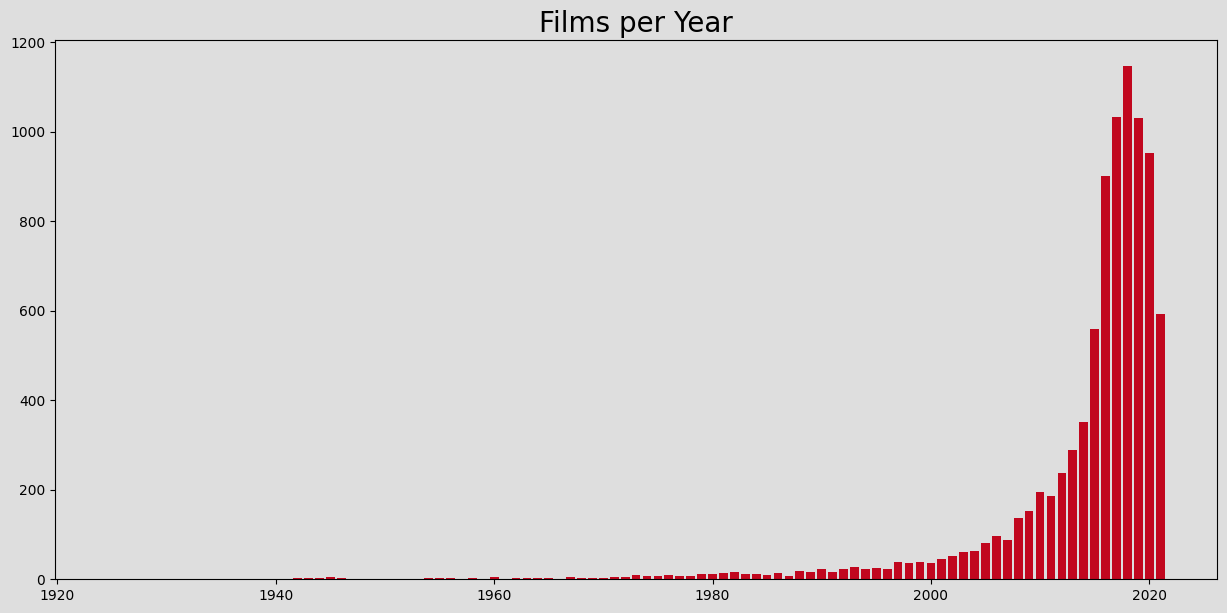

In [ ]:
fig, ax = plt.subplots(figsize=(15,7), facecolor='#dedede')
ax.bar(release_years['index'],release_years['release_year'], color = bar_color)
plt.title(label="Films per Year",
          fontsize=20,
          color="#000000")
ax.set_facecolor('#dedede');

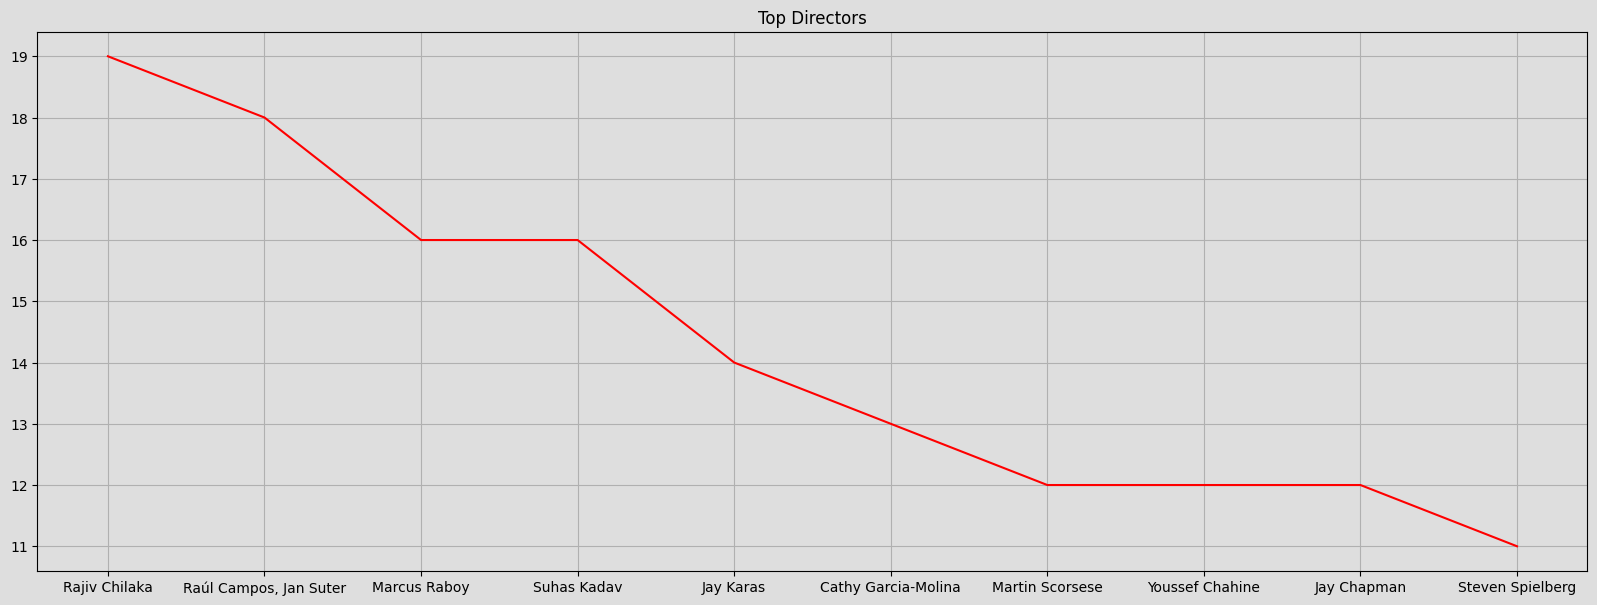

In [ ]:
fig, ax = plt.subplots(figsize = (20,7), facecolor ='#dedede')
ax.plot(data['director'].value_counts(ascending=False).head(10), color='red')
plt.title(label ='Top Directors')
plt.grid()
ax.set_facecolor('#dedede');

In [ ]:
country = data.assign(country=data['country'].str.split(', ')).explode('country')
country_df = pd.DataFrame(country['country'].value_counts()).reset_index()

In [ ]:
country_df.head(10)

,index,country
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


<ipython-input-20-73aeecda2faa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_df['index'].iloc[:11], rotation=(0))


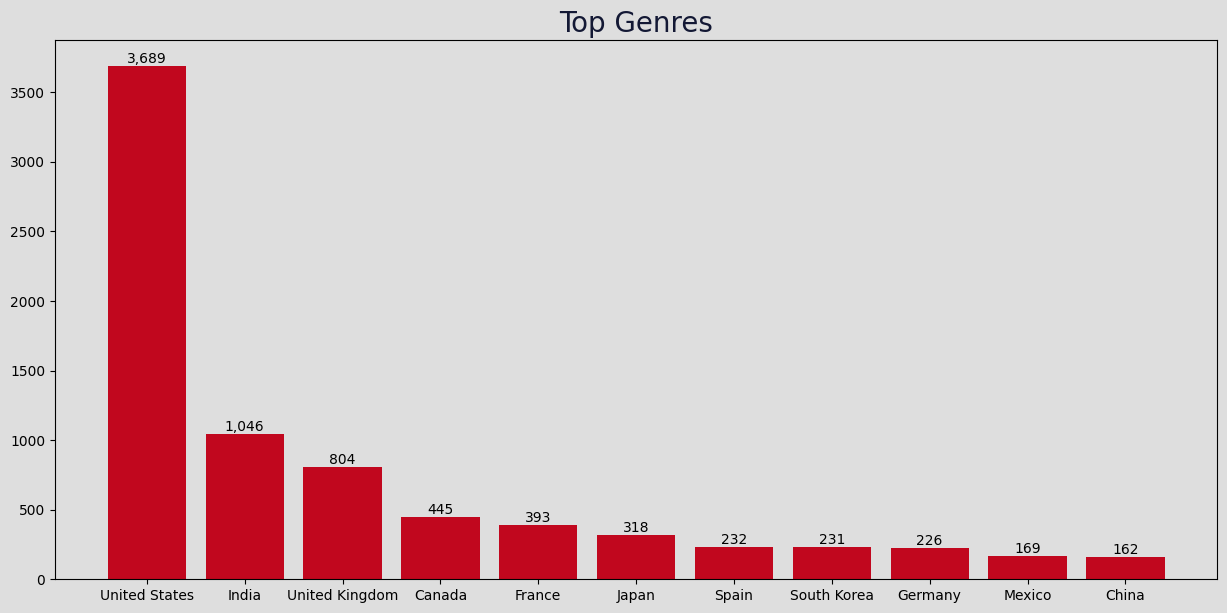

In [ ]:
fig, ax = plt.subplots(figsize = (15,7), facecolor='#dedede')
bar_color = ['#c1071e']
background_color = ['#43465e']
bar_container = ax.bar(country_df['index'].iloc[:11], country_df['country'].iloc[:11], color = bar_color)
ax.set_xticklabels(country_df['index'].iloc[:11], rotation=(0))
ax.set_facecolor('#dedede')
plt.title(label="Top Genres",
          fontsize=20,
          color="#131834")
ax.bar_label(bar_container, fmt='{:,.0f}');